In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/[1h]BTCUSDT.csv", 
                 parse_dates=['Start', 'Stop'], 
                 date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)/1000))
df.columns = ["start", "stop", "open", "close", "high", "low", "volume"]

df_m = pd.read_csv("data/[1m]BTCUSDT.csv", 
                 parse_dates=['Start', 'Stop'], 
                 date_parser=lambda x: datetime.datetime.fromtimestamp(float(x)/1000))
df_m.columns = ["start", "stop", "open", "close", "high", "low", "volume"]

In [3]:
df.head()

,start,stop,open,close,high,low,volume
0,2017-08-17 07:00:00,2017-08-17 07:59:59.999,4261.48,4308.83,4261.32,4313.62,47.181009
1,2017-08-17 08:00:00,2017-08-17 08:59:59.999,4308.83,4315.32,4291.37,4328.69,23.234916
2,2017-08-17 09:00:00,2017-08-17 09:59:59.999,4330.29,4324.35,4309.37,4345.45,7.229691
3,2017-08-17 10:00:00,2017-08-17 10:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 11:00:00,2017-08-17 11:59:59.999,4333.32,4360.69,4333.32,4377.85,0.972807


In [4]:
df.describe()

,open,close,high,low,volume
count,29476.000000,29476.000000,29476.000000,29476.000000,29476.000000
mean,8538.256402,8539.078515,8483.880319,8588.325331,1864.832375
std,3721.469254,3723.272839,3688.606975,3750.665540,2036.178771
min,2870.900000,2919.000000,2817.000000,2950.000000,0.000000
25%,6382.085000,6382.487500,6359.000000,6412.747500,797.492936
50%,8137.110000,8137.200000,8093.065000,8176.110000,1354.517014
75%,10115.905000,10116.612500,10058.617500,10172.285000,2242.905103
max,29155.240000,29155.250000,28960.170000,29300.000000,47255.762685


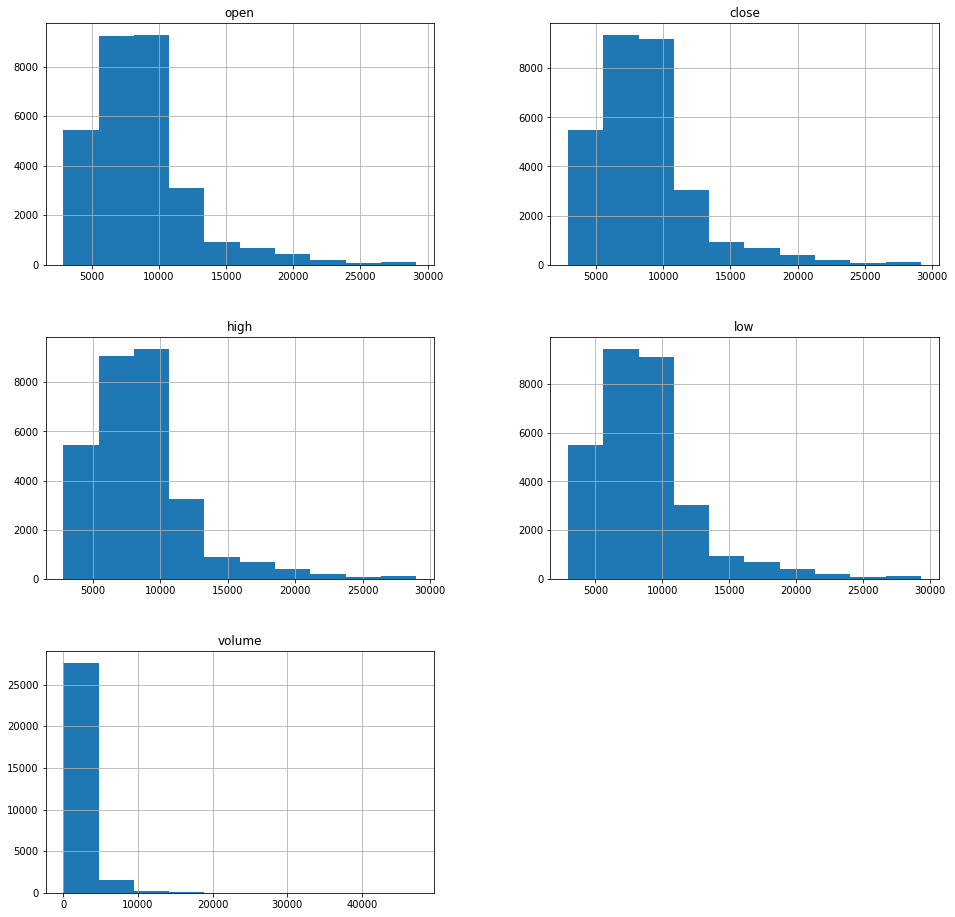

In [5]:
df[["open", "close", "high", "low", "volume"]].hist(figsize=(16,16))
plt.show()

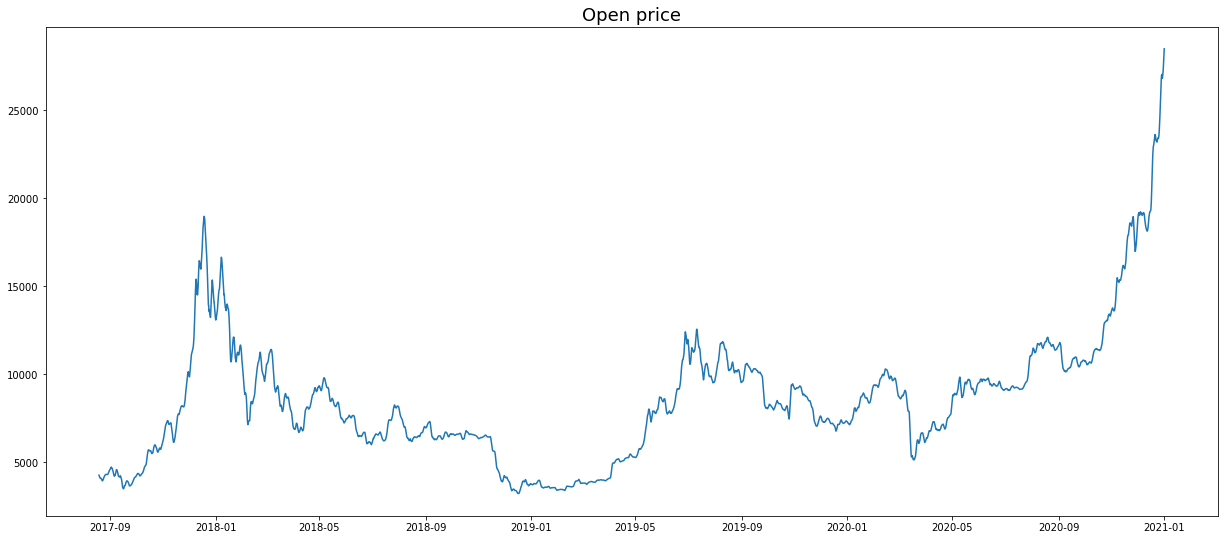

In [6]:
plt.figure(figsize=(21, 9))
plt.plot(df.start, df.open.rolling(window=50).mean())

plt.title("Open price", fontsize=18)

plt.show()

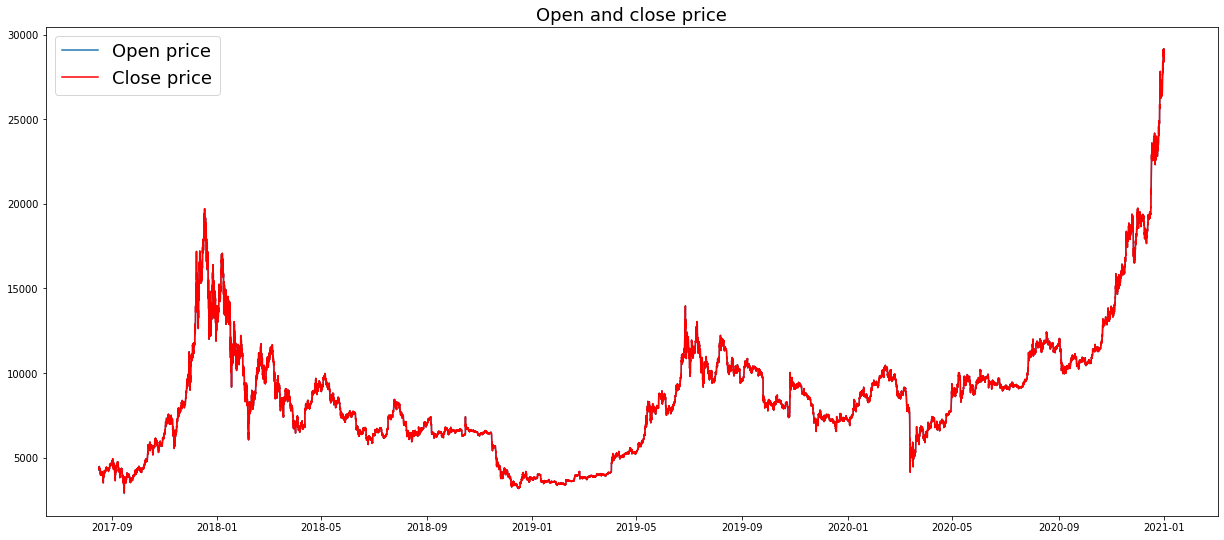

In [7]:
plt.figure(figsize=(21, 9))

plt.plot(df.start, df.open, label="Open price")
plt.plot(df.start, df.close, 'r', label="Close price")

plt.legend(fontsize=18)
plt.title("Open and close price", fontsize=18)

plt.show()

Almost the same.

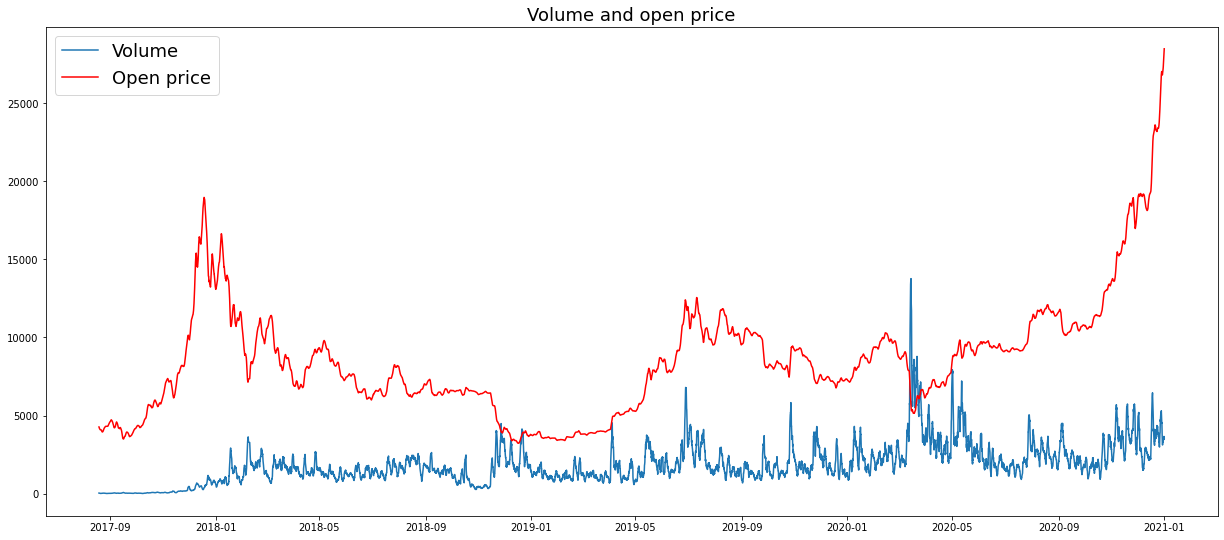

In [8]:
plt.figure(figsize=(21, 9))
plt.plot(df.start, df.volume.rolling(window=50).mean(), label="Volume")
plt.plot(df.start, df.open.rolling(window=50).mean(), 'r', label="Open price")

plt.legend(fontsize=18)
plt.title("Volume and open price", fontsize=18)

plt.show()

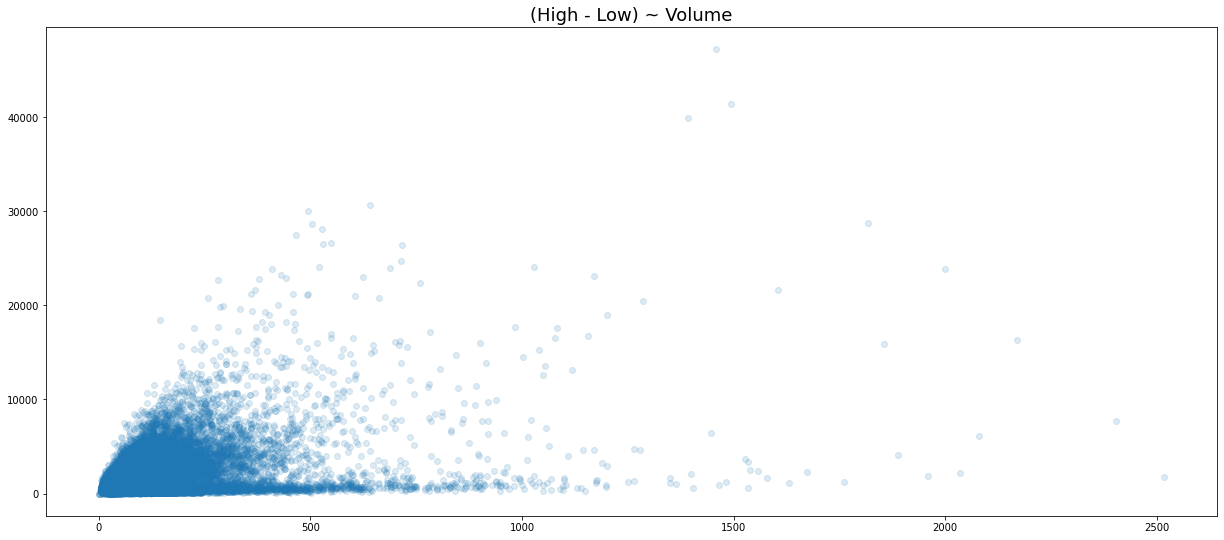

In [9]:
plt.figure(figsize=(21, 9))
plt.plot((df.low - df.high), df.volume, linestyle="",marker="o", alpha=0.15)

plt.title("(High - Low) ~ Volume", fontsize=18)
plt.show()

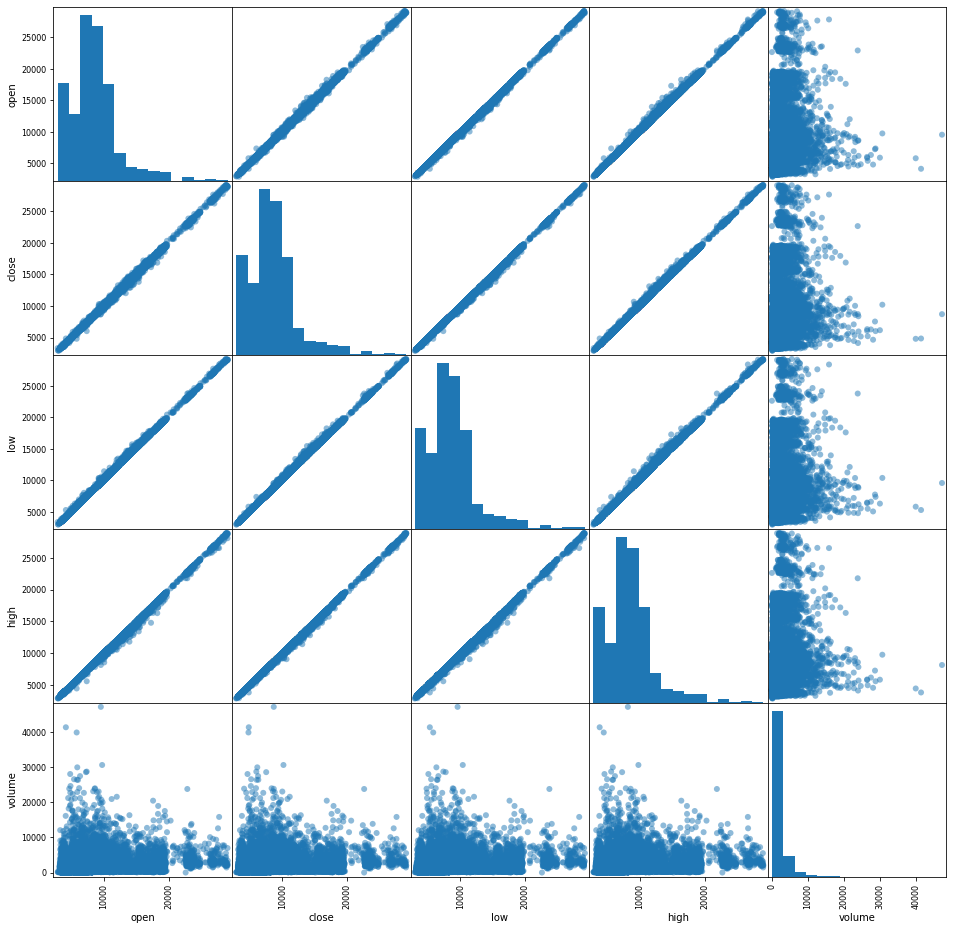

In [10]:
from matplotlib import cm

if df.size > 250000 :
    pass
else:
    X = df[['open', 'close', 'low', 'high', 'volume']]
    cmap = cm.get_cmap('gnuplot')
    scatter = pd.plotting.scatter_matrix(df[['open', 'close', 'low', 'high', 'volume']], 
                                         marker = 'o', hist_kwds={'bins':15}, figsize=(16,16))

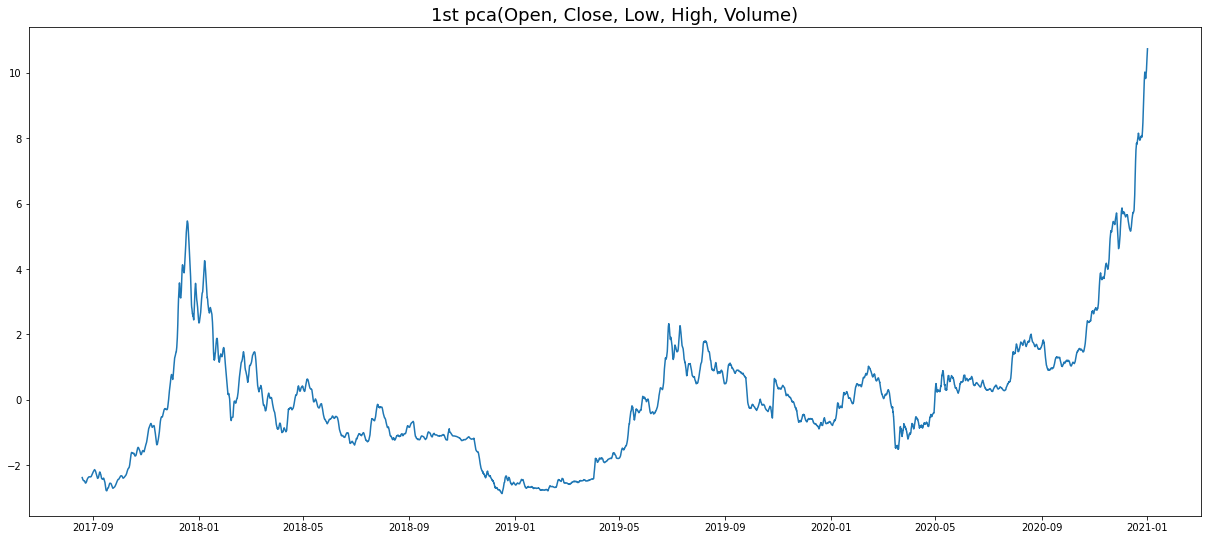

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca = StandardScaler().fit_transform(df[["open", "close", "low", "high", "volume"]].copy())

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component'])

plt.figure(figsize=(21, 9))
plt.plot(df.start, principalDf.rolling(window=50).mean())

plt.title("1st pca(Open, Close, Low, High, Volume)", fontsize=18)
plt.show()

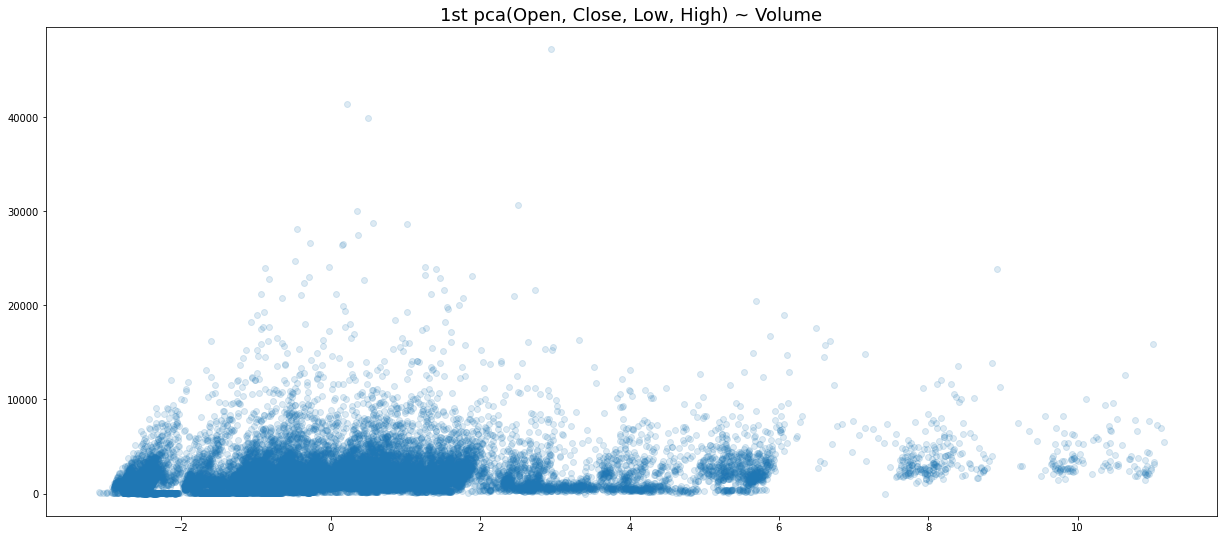

In [12]:
# plot 1st pca(Open, Close, Low, High) ~ Volume
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca_2 = StandardScaler().fit_transform(df[["open", "close", "low", "high", "volume"]].copy())

pca = PCA(n_components=1)
principalComponents_2 = pca.fit_transform(df_pca_2)

plt.figure(figsize=(21, 9))
plt.plot(principalComponents_2, df.volume, linestyle="",marker="o", alpha=0.15)

plt.title("1st pca(Open, Close, Low, High) ~ Volume", fontsize=18)
plt.show()

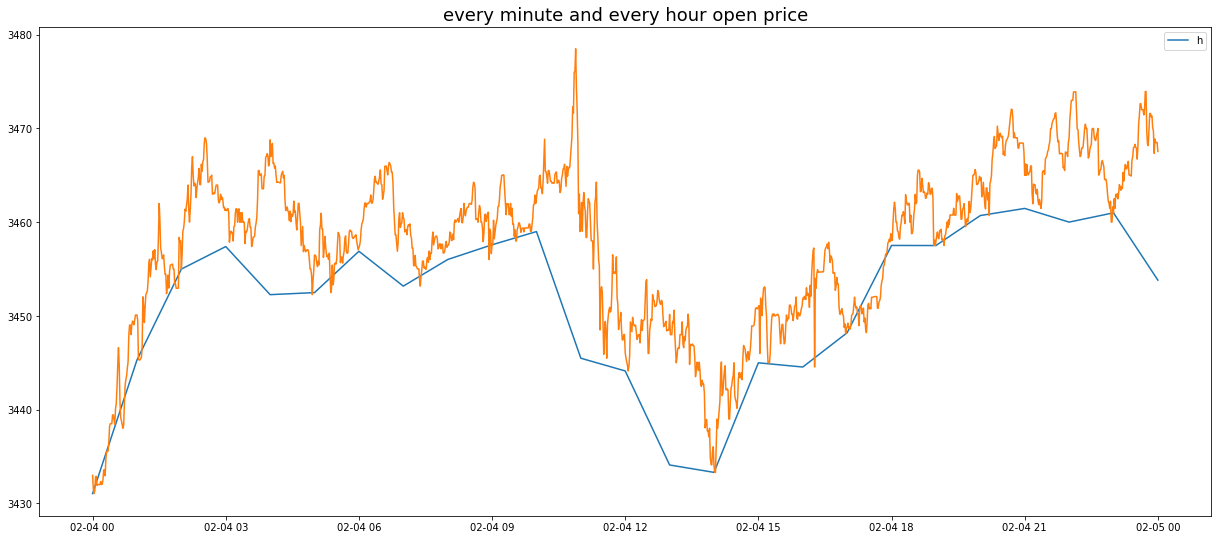

In [13]:
plt.figure(figsize=(21, 9))

df_visual = df[(df['start'] >= "2019-02-04 00:00:00") & (df['start'] <= "2019-02-05 00:00:00")]
df_m_visual = df_m[(df_m['start'] >= "2019-02-04 00:00:00") & (df_m['start'] <= "2019-02-05 00:00:00")]

plt.plot(df_visual.start, df_visual.high, label='h')
plt.plot(df_m_visual.start, df_m_visual.high)

plt.title("every minute and every hour open price", fontsize=18)
plt.legend()
plt.show()

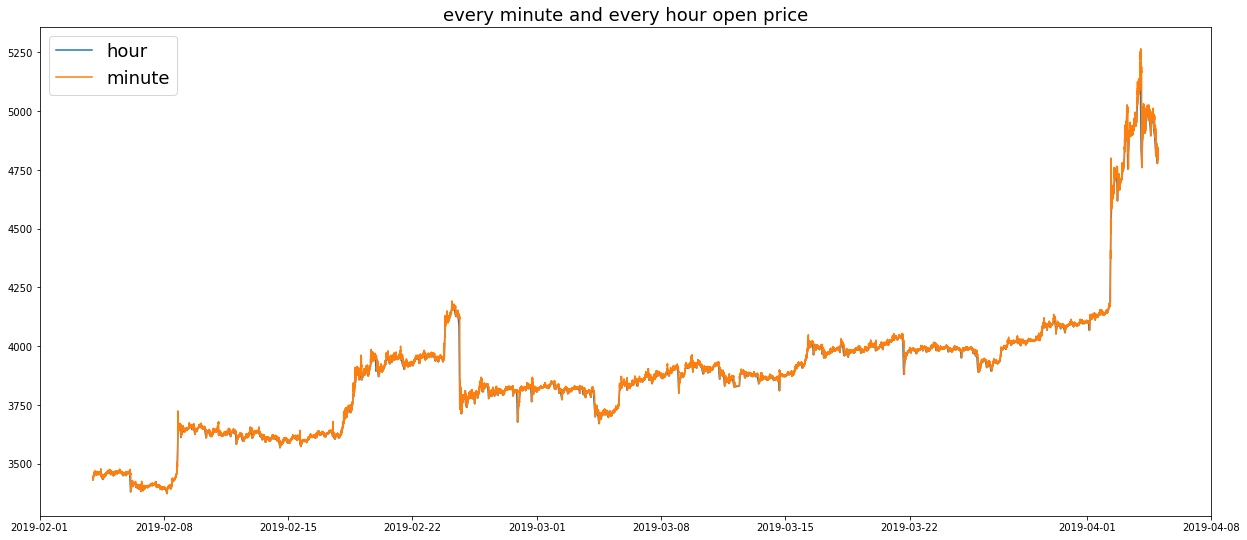

In [14]:
plt.figure(figsize=(21, 9))

df_visual = df[(df['start'] >= "2019-02-04 00:00:00") & (df['start'] <= "2019-04-05 00:00:00")]
df_m_visual = df_m[(df_m['start'] >= "2019-02-04 00:00:00") & (df_m['start'] <= "2019-04-05 00:00:00")]

plt.plot(df_visual.start, df_visual.high, label='hour')
plt.plot(df_m_visual.start, df_m_visual.high, label='minute')

plt.title("every minute and every hour open price", fontsize=18)
plt.legend(fontsize=18)
plt.show()

As we can see, it's no use to make plot for every minute observation over a long period of time, because we don't get more information, just more noise.